In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy as stats 
import seaborn as sns 

ModuleNotFoundError: No module named 'pandas'

In [ ]:
cardio_data =pd.read_csv(r"D:\assignments\Cardiotocographic.csv")
cardio_data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [ ]:
cardio_data.shape

(2126, 14)

In [ ]:
new_column_names = {
    'LB': 'BaselineFHR',
    'AC': 'Accelerations',
    'FM': 'FetalMovements',
    'UC': 'UterineContractions',
    'DL': 'DecelerationsLate',
    'DS': 'DecelerationsShort',
    'DP': 'DecelerationsProlonged',
    'ASTV': 'AbnormalShortTermVariability',
    'MSTV': 'MeanShortTermVariability',
    'ALTV': 'AbnormalLongTermVariability',
    'MLTV': 'MeanLongTermVariability'
}

In [ ]:
cardio_data = cardio_data.rename(columns=new_column_names)
cardio_data.head()

,BaselineFHR,Accelerations,FetalMovements,UterineContractions,DecelerationsLate,DecelerationsShort,DecelerationsProlonged,AbnormalShortTermVariability,MeanShortTermVariability,AbnormalLongTermVariability,MeanLongTermVariability,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [ ]:
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BaselineFHR                   2105 non-null   float64
 1   Accelerations                 2106 non-null   float64
 2   FetalMovements                2126 non-null   float64
 3   UterineContractions           2126 non-null   float64
 4   DecelerationsLate             2126 non-null   float64
 5   DecelerationsShort            2105 non-null   float64
 6   DecelerationsProlonged        2105 non-null   float64
 7   AbnormalShortTermVariability  2126 non-null   float64
 8   MeanShortTermVariability      2126 non-null   float64
 9   AbnormalLongTermVariability   2126 non-null   float64
 10  MeanLongTermVariability       2105 non-null   float64
 11  Width                         2105 non-null   float64
 12  Tendency                      2105 non-null   float64
 13  NSP

In [ ]:
cardio_data.describe()

,BaselineFHR,Accelerations,FetalMovements,UterineContractions,DecelerationsLate,DecelerationsShort,DecelerationsProlonged,AbnormalShortTermVariability,MeanShortTermVariability,AbnormalLongTermVariability,MeanLongTermVariability,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [ ]:
cardio_data.isna().sum()

BaselineFHR                     21
Accelerations                   20
FetalMovements                   0
UterineContractions              0
DecelerationsLate                0
DecelerationsShort              21
DecelerationsProlonged          21
AbnormalShortTermVariability     0
MeanShortTermVariability         0
AbnormalLongTermVariability      0
MeanLongTermVariability         21
Width                           21
Tendency                        21
NSP                             21
dtype: int64

#### Dropping missing values:

In [ ]:
#droping row missing values 
cardio_data.dropna(axis =0 , inplace =True)
#droping columns missing values 
cardio_data.dropna(axis =1  ,inplace =True)

In [ ]:
cardio_data.isna().sum()

BaselineFHR                     0
Accelerations                   0
FetalMovements                  0
UterineContractions             0
DecelerationsLate               0
DecelerationsShort              0
DecelerationsProlonged          0
AbnormalShortTermVariability    0
MeanShortTermVariability        0
AbnormalLongTermVariability     0
MeanLongTermVariability         0
Width                           0
Tendency                        0
NSP                             0
dtype: int64

#### filling the missing values :

In [ ]:
#filling the missing values with the mean.
cardio_data.fillna(cardio_data.mean(), inplace=True) 

In [ ]:
# Linear interpolation along the column
cardio_data.interpolate(method='linear', axis=0, inplace=True)

In [ ]:
from sklearn.impute import KNNImputer

# Initialize KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Impute missing values
cardio_data_imputed = imputer.fit_transform(cardio_data)


In [ ]:
cardio_data.head()

,BaselineFHR,Accelerations,FetalMovements,UterineContractions,DecelerationsLate,DecelerationsShort,DecelerationsProlonged,AbnormalShortTermVariability,MeanShortTermVariability,AbnormalLongTermVariability,MeanLongTermVariability,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [ ]:
cardio_data.columns

Index(['BaselineFHR', 'Accelerations', 'FetalMovements', 'UterineContractions',
       'DecelerationsLate', 'DecelerationsShort', 'DecelerationsProlonged',
       'AbnormalShortTermVariability', 'MeanShortTermVariability',
       'AbnormalLongTermVariability', 'MeanLongTermVariability', 'Width',
       'Tendency', 'NSP'],
      dtype='object')

In [ ]:
from scipy import stats

# Calculate Z-scores for each column
z_scores = stats.zscore(cardio_data)

threshold = 3
outliers = (z_scores > threshold).any(axis=1)

# Get indices of outliers
outlier_indices = cardio_data.index[outliers]

# Remove outliers
cardio_data_cleaned = cardio_data[~outliers]


In [ ]:
# Replace outliers with median
for column in cardio_data.columns:
    median = cardio_data[column].median()
    cardio_data.loc[outliers, column] = median


#### 2.	Statistical Summary

In [ ]:
cardio_data.describe()

,BaselineFHR,Accelerations,FetalMovements,UterineContractions,DecelerationsLate,DecelerationsShort,DecelerationsProlonged,AbnormalShortTermVariability,MeanShortTermVariability,AbnormalLongTermVariability,MeanLongTermVariability,Width,Tendency,NSP
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.157620,0.003027,0.002466,0.004354,0.001529,-0.000004,0.000083,46.806785,1.265890,8.327746,8.097144,68.184261,0.295954,1.220457
std,9.951103,0.003693,0.028893,0.002891,0.002752,0.000078,0.000458,16.939722,0.779373,16.647901,5.752370,37.843038,0.602734,0.530486
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.000000
25%,127.000000,0.000000,0.000000,0.002339,0.000000,0.000000,0.000000,34.000000,0.700000,0.000000,5.200000,39.000000,0.000000,1.000000
50%,133.000000,0.001631,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005076,0.001784,0.006329,0.002475,0.000000,0.000000,60.000000,1.600000,9.000000,10.500000,95.000000,1.000000,1.000000
max,160.000000,0.016000,0.189320,0.013861,0.011837,0.000006,0.002674,87.000000,4.800000,74.000000,29.500000,180.000000,1.023635,3.034545


#### visulization ;

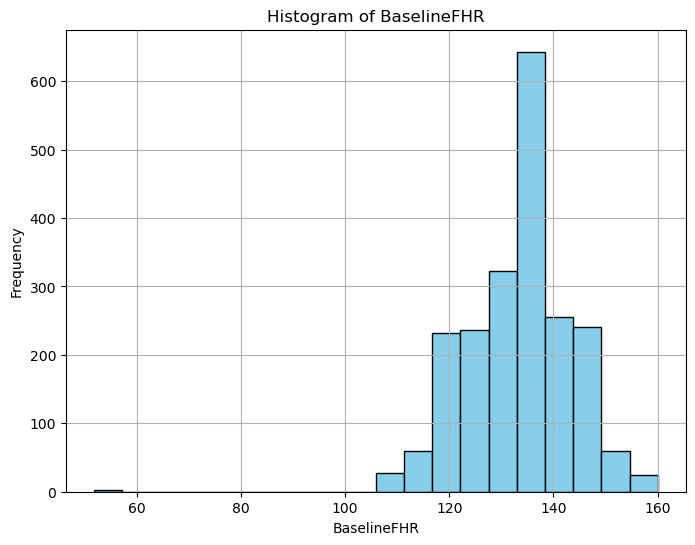

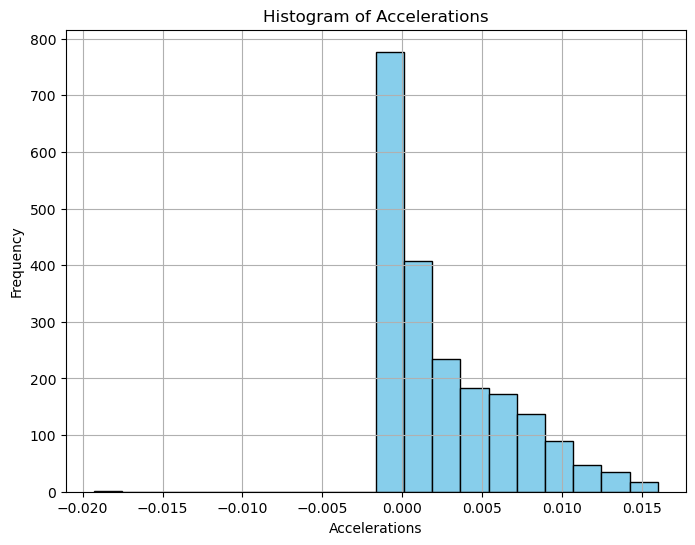

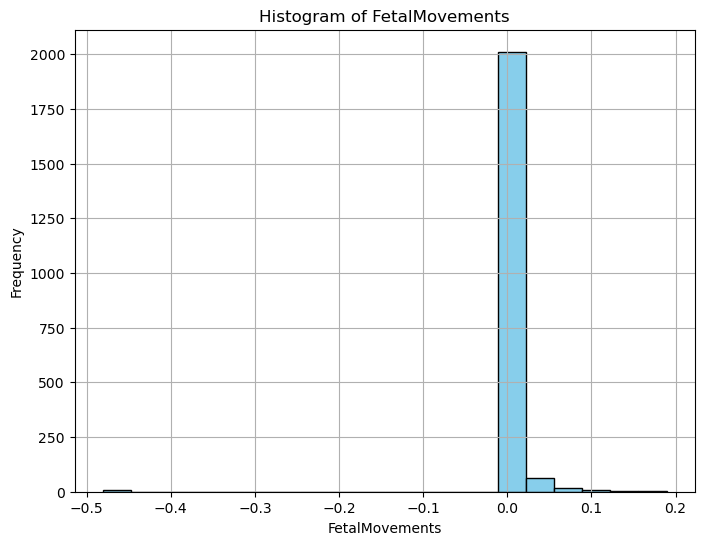

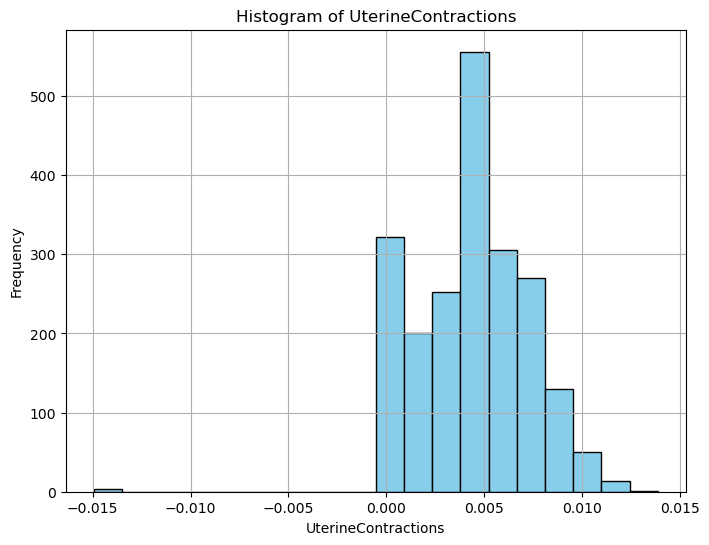

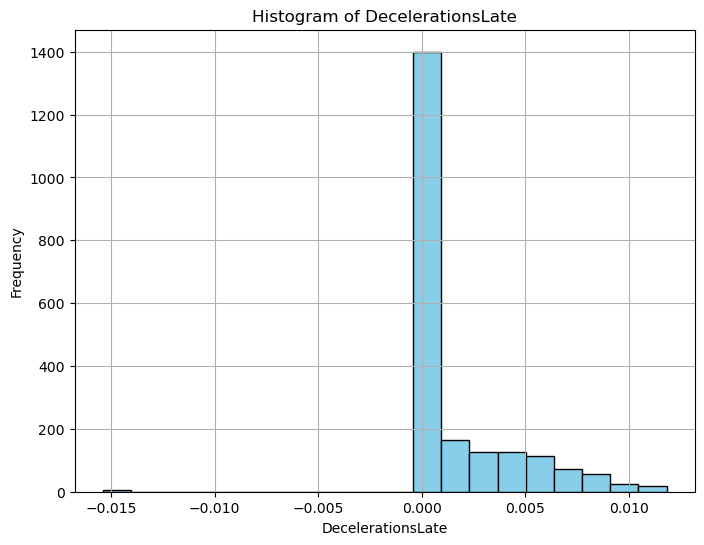

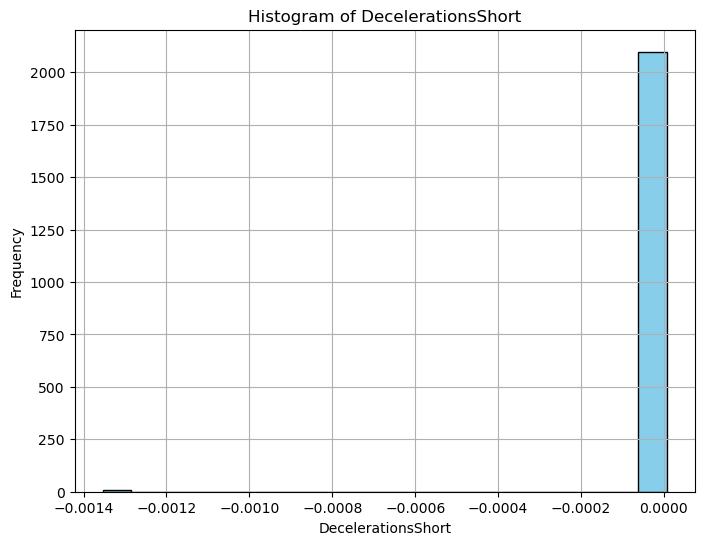

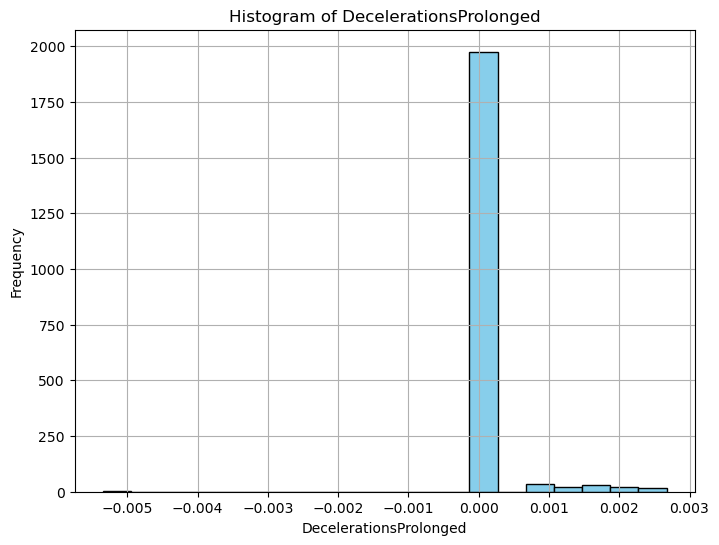

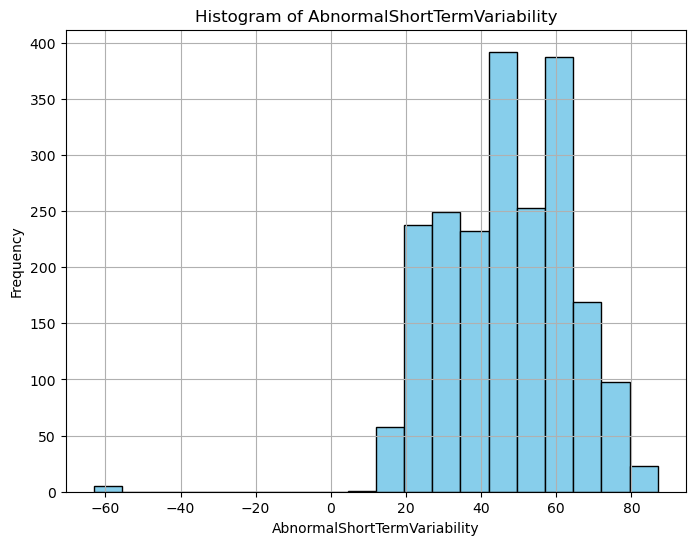

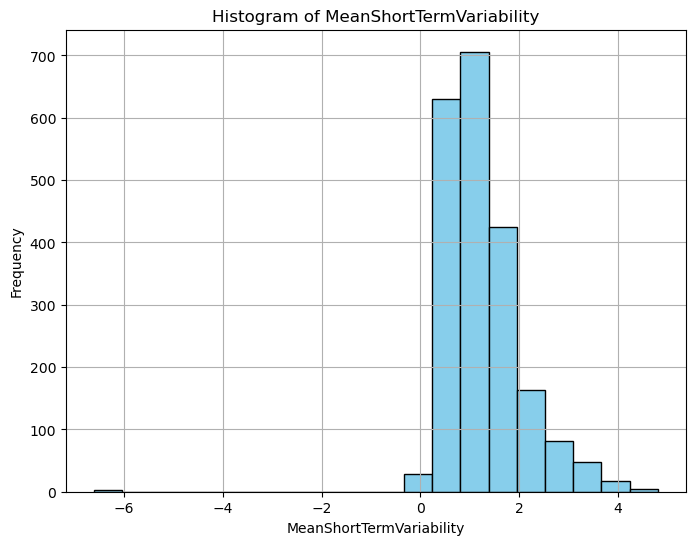

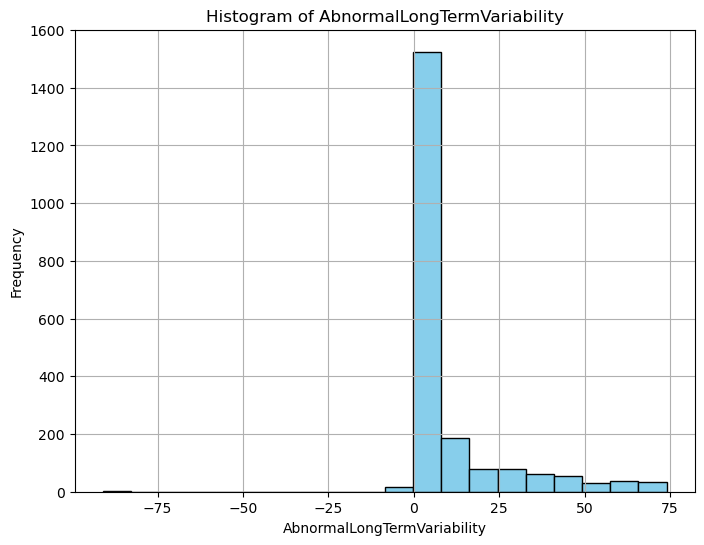

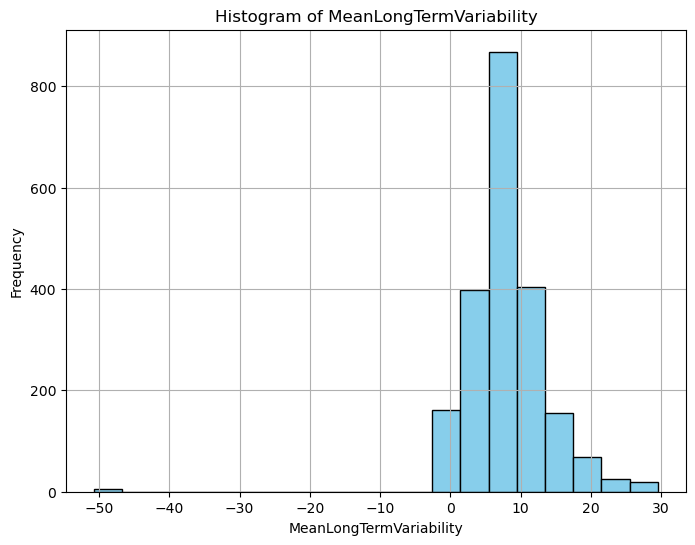

In [ ]:

# List of numerical variables
numerical_variables = ['BaselineFHR', 'Accelerations', 'FetalMovements', 'UterineContractions', 
                       'DecelerationsLate', 'DecelerationsShort', 'DecelerationsProlonged', 
                       'AbnormalShortTermVariability', 'MeanShortTermVariability', 
                       'AbnormalLongTermVariability', 'MeanLongTermVariability']

# Plot histograms for each numerical variable
for var in numerical_variables:
    plt.figure(figsize=(8, 6))
    plt.hist(cardio_data[var], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [ ]:
cardio_data.columns

NameError: name 'cardio_data' is not defined

In [ ]:
columns = ['BaselineFHR', 'Accelerations', 'FetalMovements', 'UterineContractions',
       'DecelerationsLate', 'DecelerationsShort', 'DecelerationsProlonged',
       'AbnormalShortTermVariability', 'MeanShortTermVariability',
       'AbnormalLongTermVariability', 'MeanLongTermVariability', 'Width',
       'Tendency', 'NSP']

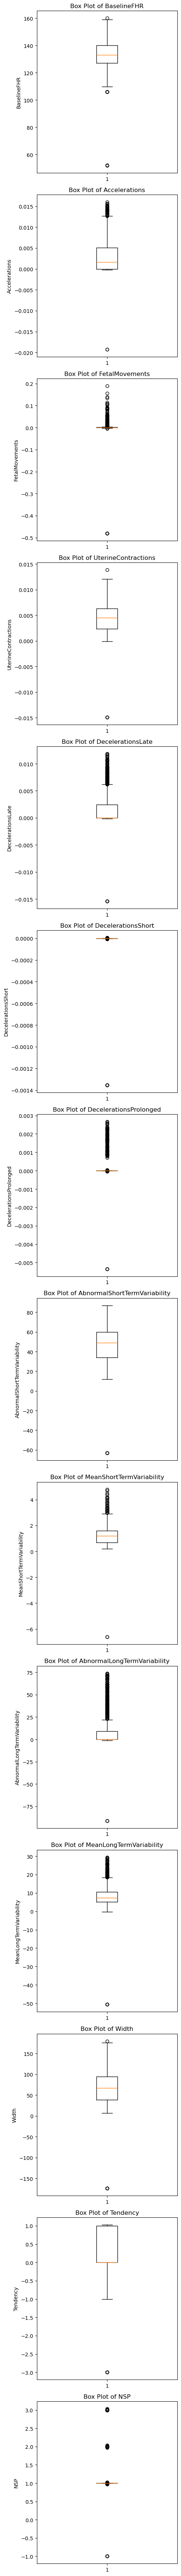

In [ ]:
fig, axes = plt.subplots(len(columns), 1, figsize=(5,5* len(columns)))

# Plotting box plots for each column
for i, column in enumerate(columns):
    axes[i].boxplot(cardio_data[column])
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_ylabel(column)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 800x600 with 0 Axes>

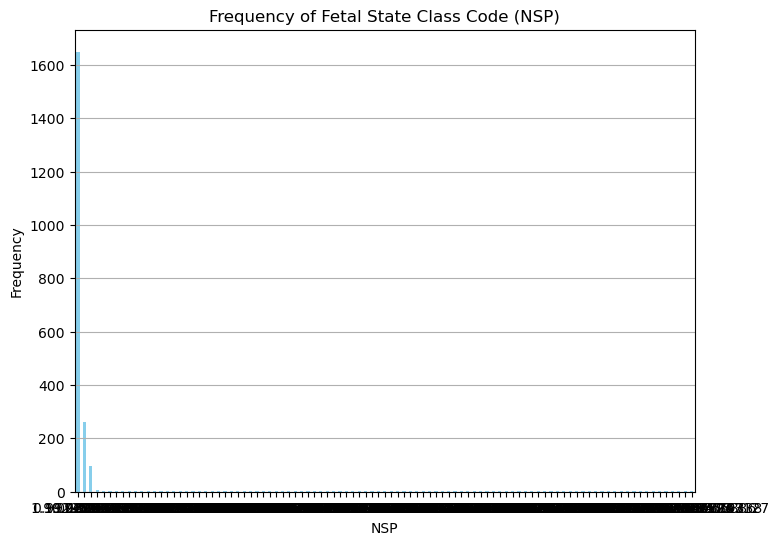

In [ ]:
import matplotlib.pyplot as plt

# Categorical variable
categorical_variable = 'NSP'

# Create bar chart for the 'NSP' variable
plt.figure(figsize=(8, 6))
cardio_data[categorical_variable].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frequency of Fetal State Class Code (NSP)')
plt.xlabel('NSP')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

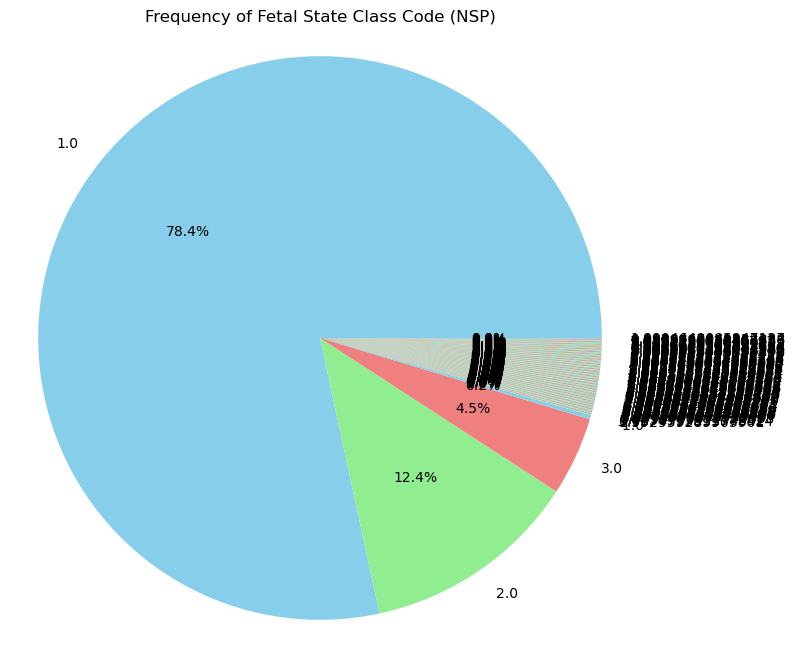

In [ ]:
import matplotlib.pyplot as plt

# Categorical variable
categorical_variable = 'NSP'

# Calculate frequency of each category
category_counts = cardio_data[categorical_variable].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Frequency of Fetal State Class Code (NSP)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

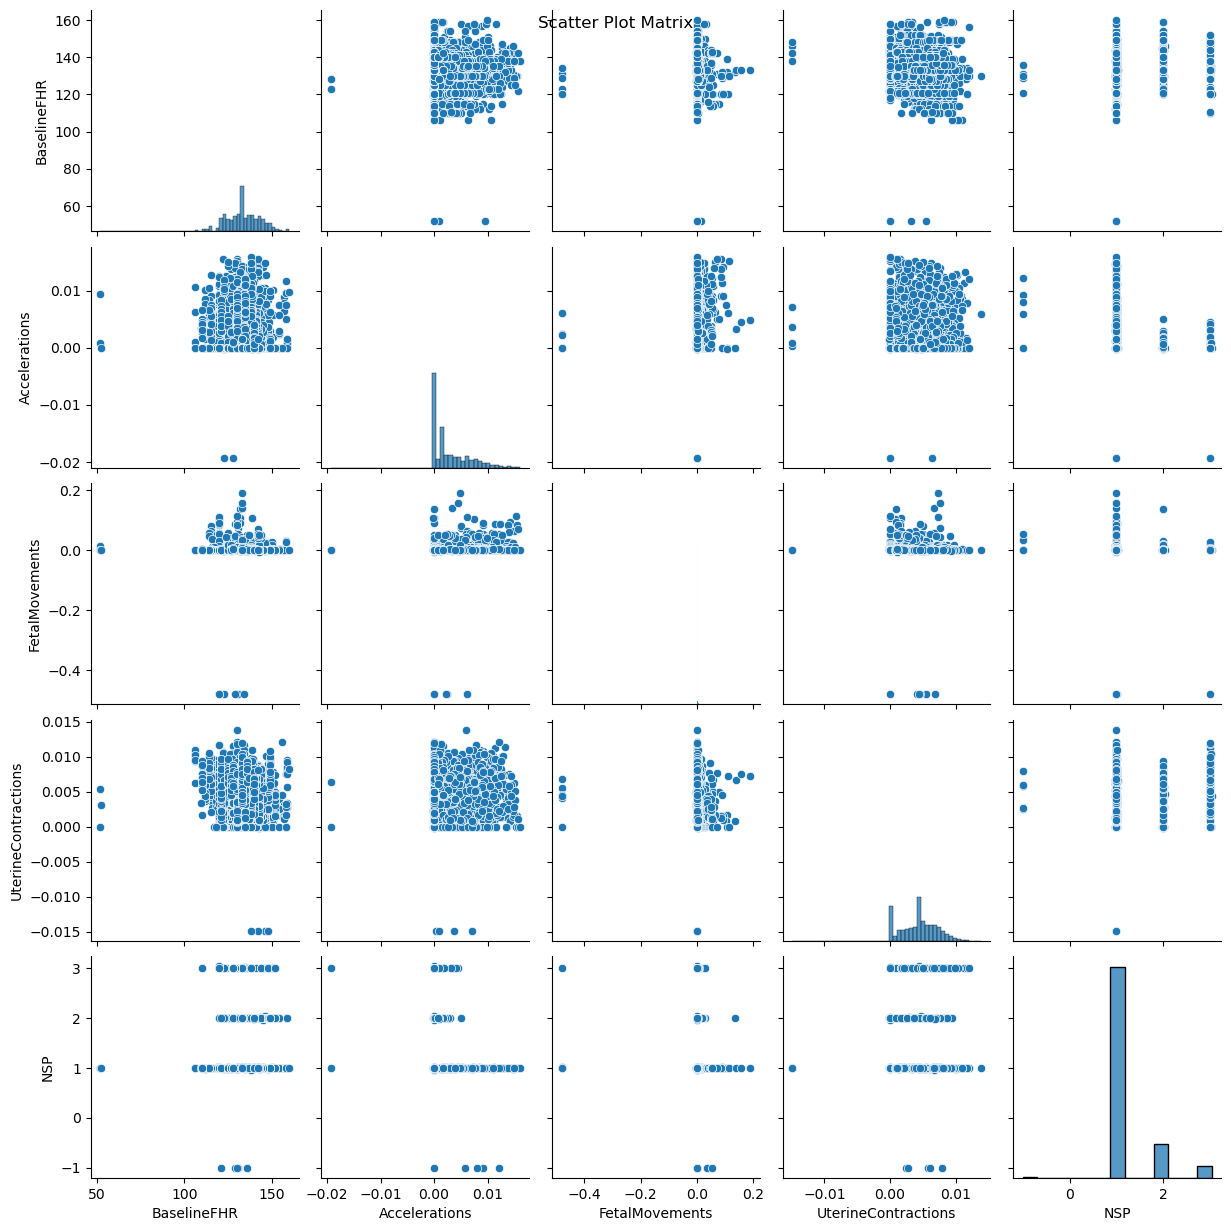

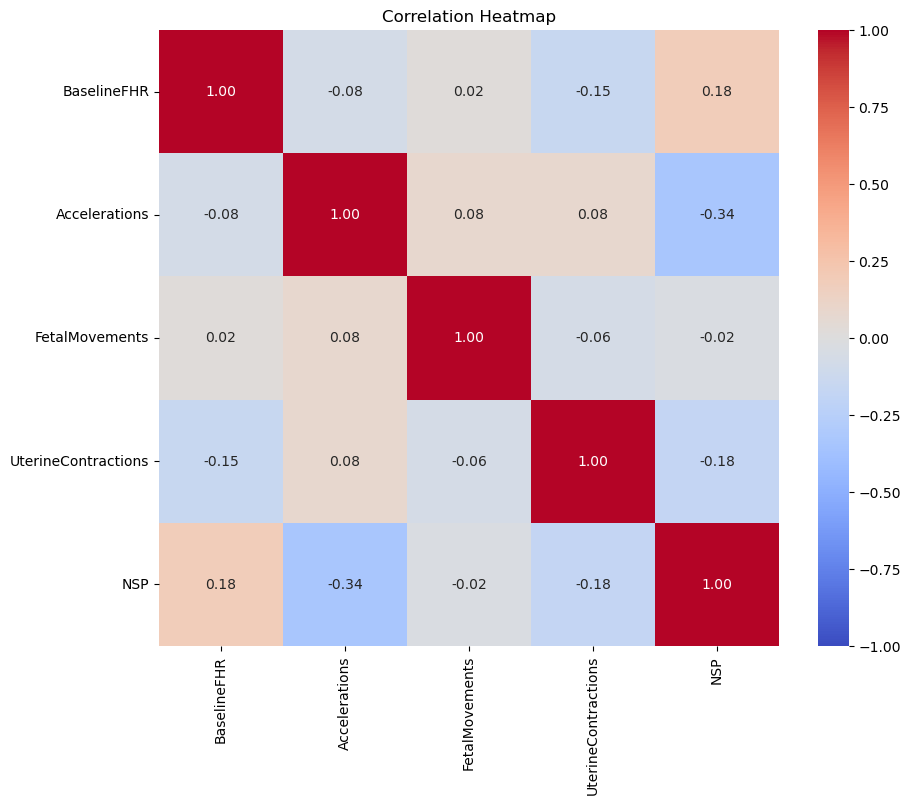

In [ ]:
# Generate scatter plots
sns.pairplot(cardio_data[['BaselineFHR', 'Accelerations', 'FetalMovements', 'UterineContractions', 'NSP']])
plt.suptitle('Scatter Plot Matrix')
plt.show()

# Generate correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cardio_data[['BaselineFHR', 'Accelerations', 'FetalMovements', 'UterineContractions', 'NSP']].corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

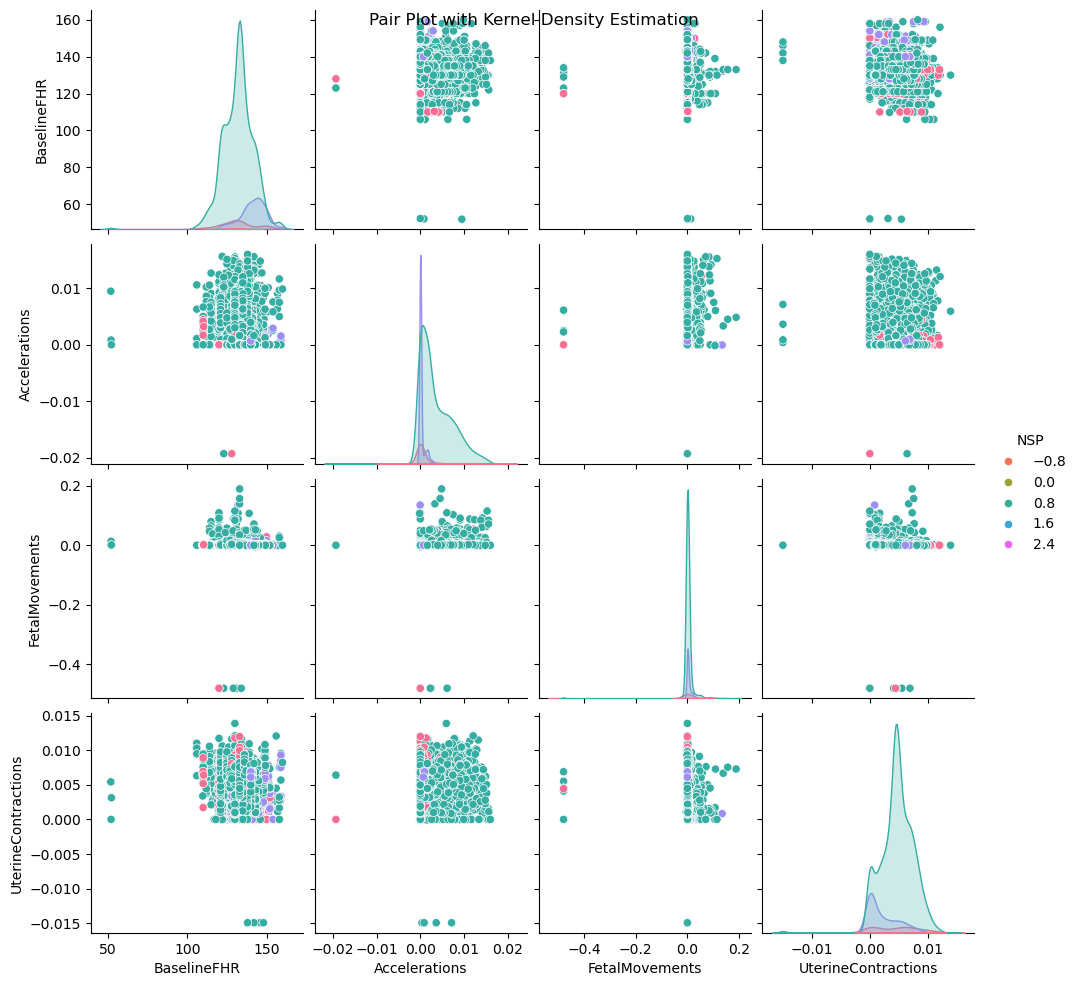

C:\Users\RAHUL\AppData\Local\Temp\ipykernel_12368\2261567587.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=cardio_data[['BaselineFHR', 'Accelerations', 'FetalMovements', 'UterineContractions', 'NSP']], x='NSP', y='BaselineFHR', palette='husl')


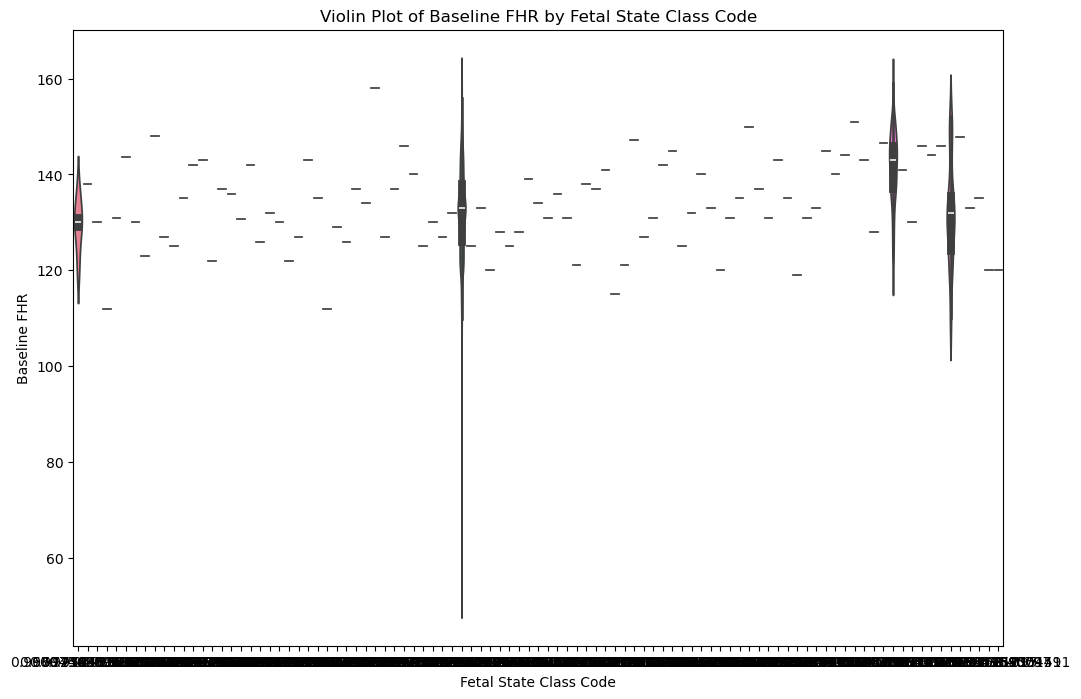

C:\Users\RAHUL\AppData\Local\Temp\ipykernel_12368\2261567587.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=cardio_data[['BaselineFHR', 'Accelerations', 'FetalMovements', 'UterineContractions', 'NSP']], x='NSP', y='Accelerations', palette='husl')


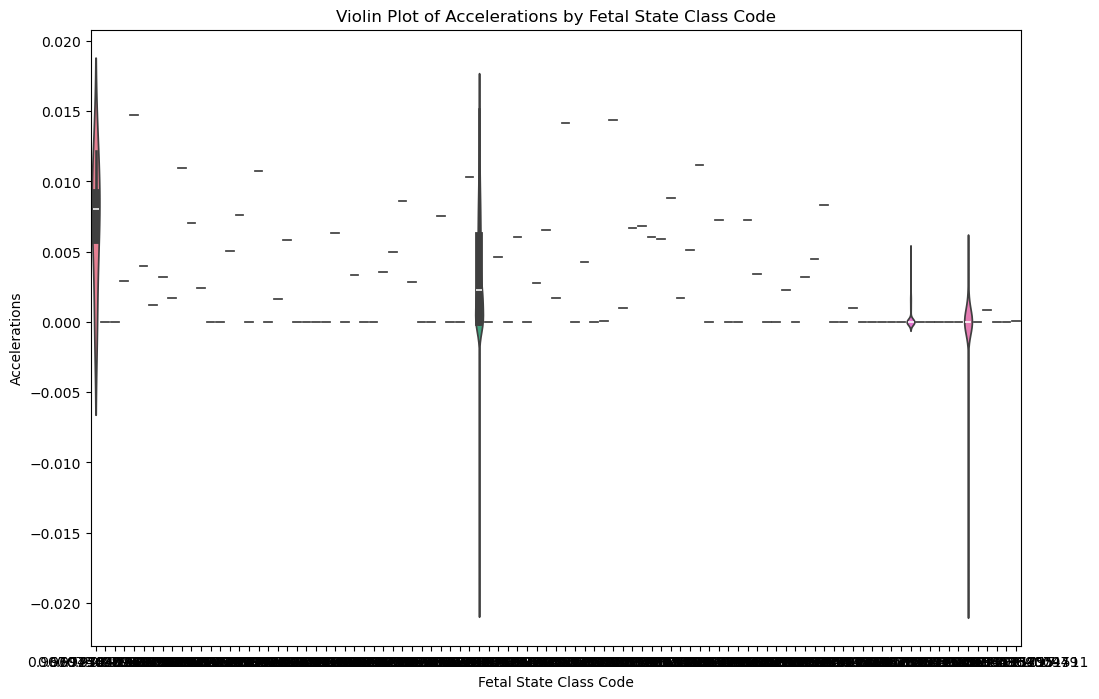

In [ ]:
# Pair plot
sns.pairplot(cardio_data[['BaselineFHR', 'Accelerations', 'FetalMovements', 'UterineContractions', 'NSP']], hue='NSP', diag_kind='kde', palette='husl')
plt.suptitle('Pair Plot with Kernel Density Estimation')
plt.show()

# Violin plots
plt.figure(figsize=(12, 8))
sns.violinplot(data=cardio_data[['BaselineFHR', 'Accelerations', 'FetalMovements', 'UterineContractions', 'NSP']], x='NSP', y='BaselineFHR', palette='husl')
plt.title('Violin Plot of Baseline FHR by Fetal State Class Code')
plt.xlabel('Fetal State Class Code')
plt.ylabel('Baseline FHR')
plt.show()

plt.figure(figsize=(12, 8))
sns.violinplot(data=cardio_data[['BaselineFHR', 'Accelerations', 'FetalMovements', 'UterineContractions', 'NSP']], x='NSP', y='Accelerations', palette='husl')
plt.title('Violin Plot of Accelerations by Fetal State Class Code')
plt.xlabel('Fetal State Class Code')
plt.ylabel('Accelerations')
plt.show()

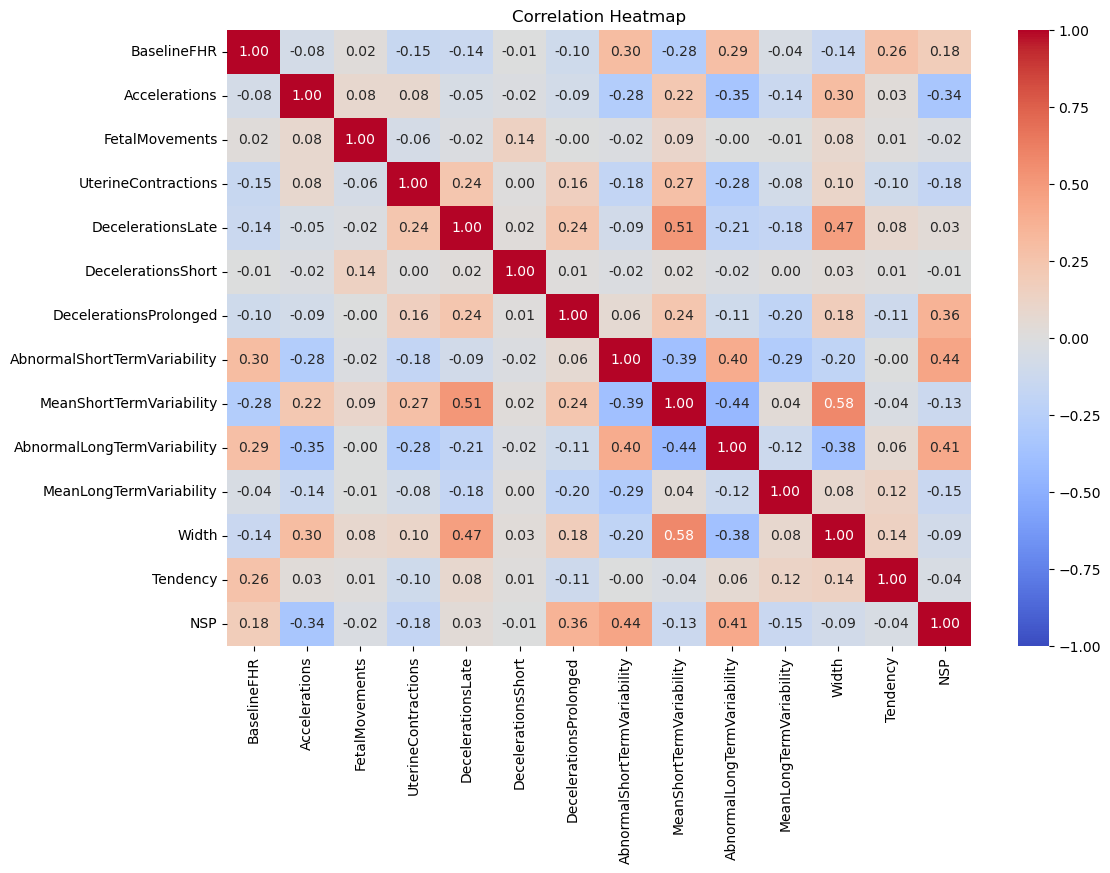

In [ ]:
# Calculate correlation matrix
correlation_matrix = cardio_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()